In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_bordeaux_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('bordeaux')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/bordeaux_{date}.csv',index=False)
get_listings_bordeaux_timeseries()

In [3]:
# pull in detailed_listings
raw_df_bordeaux = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_bordeaux)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(bordeaux_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 9424 AirBnb listings.


In [4]:
bordeaux_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2020-12.csv')
bordeaux_raw_df_12_12_2020.shape





(10562, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for bordeaux
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_bordeaux = glob.glob('bordeaux/**.csv')
files_bordeaux

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['bordeaux/Bordeaux_2021-08.csv',
 'bordeaux/Bordeaux_2021-09.csv',
 'bordeaux/Bordeaux_2020-12.csv',
 'bordeaux/Bordeaux_2021-10.csv',
 'bordeaux/Bordeaux_2021-04.csv',
 'bordeaux/Bordeaux_2021-07.csv',
 'bordeaux/Bordeaux_2021-06.csv',
 'bordeaux/Bordeaux_2021-02.csv',
 'bordeaux/Bordeaux_2021-03.csv',
 'bordeaux/Bordeaux_2021-01.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

bordeaux_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(bordeaux_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_12_12_2020['price'].mean(),2)}.")

bordeaux_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(bordeaux_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_1_9_2021['price'].mean(),2)}.")

bordeaux_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(bordeaux_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_2_8_2021['price'].mean(),2)}.")

bordeaux_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(bordeaux_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_3_4_2021['price'].mean(),2)}.")

bordeaux_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(bordeaux_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_4_9_2021['price'].mean(),2)}.")

#bordeaux_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(bordeaux_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_5_19_2021['price'].mean(),2)}.")

bordeaux_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(bordeaux_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_6_3_2021['price'].mean(),2)}.")

bordeaux_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(bordeaux_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_7_4_2021['price'].mean(),2)}.")

bordeaux_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(bordeaux_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_8_6_2021['price'].mean(),2)}.")

bordeaux_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(bordeaux_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_9_7_2021['price'].mean(),2)}.")

bordeaux_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(bordeaux_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_10_6_2021['price'].mean(),2)}.")

#bordeaux_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(bordeaux_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 10562 AirBnb listings; the avg price is €89.18.
The 1_9_2021 dataset contains 10615 AirBnb listings; the avg price is €87.85.
The 2_8_2021 dataset contains 10590 AirBnb listings; the avg price is €89.51.
The 3_4_2021 dataset contains 10466 AirBnb listings; the avg price is €89.95.
The 4_9_2021 dataset contains 10567 AirBnb listings; the avg price is €91.56.
The 6_3_2021 dataset contains 10496 AirBnb listings; the avg price is €94.35.
The 7_4_2021 dataset contains 10616 AirBnb listings; the avg price is €95.36.
The 8_6_2021 dataset contains 9663 AirBnb listings; the avg price is €98.91.
The 9_7_2021 dataset contains 9440 AirBnb listings; the avg price is €96.77.
The 10_6_2021 dataset contains 9424 AirBnb listings; the avg price is €96.95.


In [7]:
df_list_bordeaux = [bordeaux_raw_df_12_12_2020, bordeaux_raw_df_1_9_2021, bordeaux_raw_df_2_8_2021,
           bordeaux_raw_df_3_4_2021, bordeaux_raw_df_4_9_2021,  bordeaux_raw_df_6_3_2021, bordeaux_raw_df_7_4_2021,
           bordeaux_raw_df_8_6_2021, bordeaux_raw_df_9_7_2021, bordeaux_raw_df_10_6_2021]

dates_bordeaux = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '06_03_2021'
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_bordeaux = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06','2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_bordeaux = []

def airbnb_parse_bordeaux(df_list, files):
    for file in files_bordeaux:

        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_{file}.csv")
        print(f"The {file} bordeaux dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_bordeaux(df_list, dates):
    for file in files_bordeaux:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_{file}.csv")
        #print(f"The {date} bordeaux dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_bordeaux.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_bordeaux)

bordeaux_parse = airbnb_parse_bordeaux(df_list_bordeaux, files_bordeaux)


The 2020-12 bordeaux dataset contains 10562 AirBnb listings -- the avg price is €89.18.
The 2021-01 bordeaux dataset contains 10615 AirBnb listings -- the avg price is €87.85.
The 2021-02 bordeaux dataset contains 10590 AirBnb listings -- the avg price is €89.51.
The 2021-03 bordeaux dataset contains 10466 AirBnb listings -- the avg price is €89.95.
The 2021-04 bordeaux dataset contains 10567 AirBnb listings -- the avg price is €91.56.
The 2021-06 bordeaux dataset contains 10496 AirBnb listings -- the avg price is €94.35.
The 2021-07 bordeaux dataset contains 10616 AirBnb listings -- the avg price is €95.36.
The 2021-08 bordeaux dataset contains 9663 AirBnb listings -- the avg price is €98.91.
The 2021-09 bordeaux dataset contains 9440 AirBnb listings -- the avg price is €96.77.
The 2021-10 bordeaux dataset contains 9424 AirBnb listings -- the avg price is €96.95.


In [8]:
bordeaux_summary = airbnb_to_frame_bordeaux(df_list_bordeaux, files_bordeaux)
bordeaux_summary['Date of scrape'] = pd.to_datetime(bordeaux_summary['Date of scrape'])
bordeaux_summary['City'] = 'bordeaux'
bordeaux_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,10562,89.18,63.0,0,8890,0.90,bordeaux
1,2021-01-01,10615,87.85,60.0,0,8890,0.88,bordeaux
2,2021-02-01,10590,89.51,61.0,0,8890,0.86,bordeaux
3,2021-03-01,10466,89.95,61.0,0,8890,0.87,bordeaux
4,2021-04-01,10567,91.56,62.0,0,8890,0.86,bordeaux
5,2021-06-01,10496,94.35,65.0,0,8890,0.89,bordeaux
6,2021-07-01,10616,95.36,65.0,0,8890,0.92,bordeaux
7,2021-08-01,9663,98.91,69.0,0,8890,1.08,bordeaux
8,2021-09-01,9440,96.77,67.0,0,8890,1.13,bordeaux
9,2021-10-01,9424,96.95,68.0,0,8890,1.11,bordeaux


In [9]:
bordeaux_summary_listings = bordeaux_summary[['Date of scrape','# of Listings']]
bordeaux_summary_listings.set_index('Date of scrape', inplace=True)


bordeaux_summary_prices_avg = bordeaux_summary[['Date of scrape', 'Avg Price']]
bordeaux_summary_prices_avg.set_index('Date of scrape', inplace=True)

bordeaux_summary_prices_median = bordeaux_summary[['Date of scrape', 'Median Price']]
bordeaux_summary_prices_median.set_index('Date of scrape', inplace=True)

bordeaux_summary_reviews_permonth = bordeaux_summary[['Date of scrape', 'Avg reviews per month']]
bordeaux_summary_reviews_permonth.set_index('Date of scrape', inplace=True)


<AxesSubplot:ylabel='Date of scrape'>

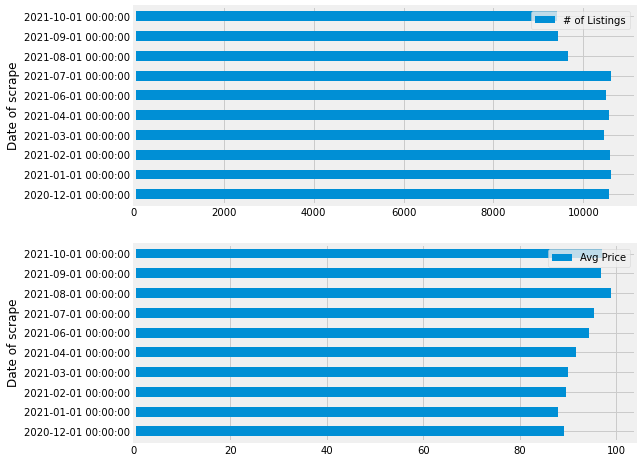

In [10]:
fig = plt.figure(figsize=(8,8))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

bordeaux_summary_listings.plot(ax=ax1, kind='barh')
bordeaux_summary_prices_avg.plot(ax=ax2, kind='barh')

In [11]:
covid = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/owid-covid-data.csv')
covid[covid['location']=='Italy'].columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

<AxesSubplot:xlabel='Date of scrape'>

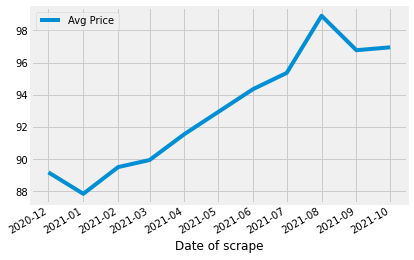

In [12]:
bordeaux_summary.plot(x='Date of scrape', y='Avg Price')

In [13]:
master_df_bordeaux = pd.concat(df_list_bordeaux)
master_df_bordeaux = master_df_bordeaux[master_df_bordeaux['room_type']=='Entire home/apt']
master_df_bordeaux_unique = master_df_bordeaux.drop_duplicates(subset='id')
#master_df_bordeaux_unique = master_df_bordeaux[master_df_bordeaux_unique['room_type']=='Entire home/apt']
master_df_bordeaux_unique['room_type'].value_counts()

Entire home/apt    10440
Name: room_type, dtype: int64

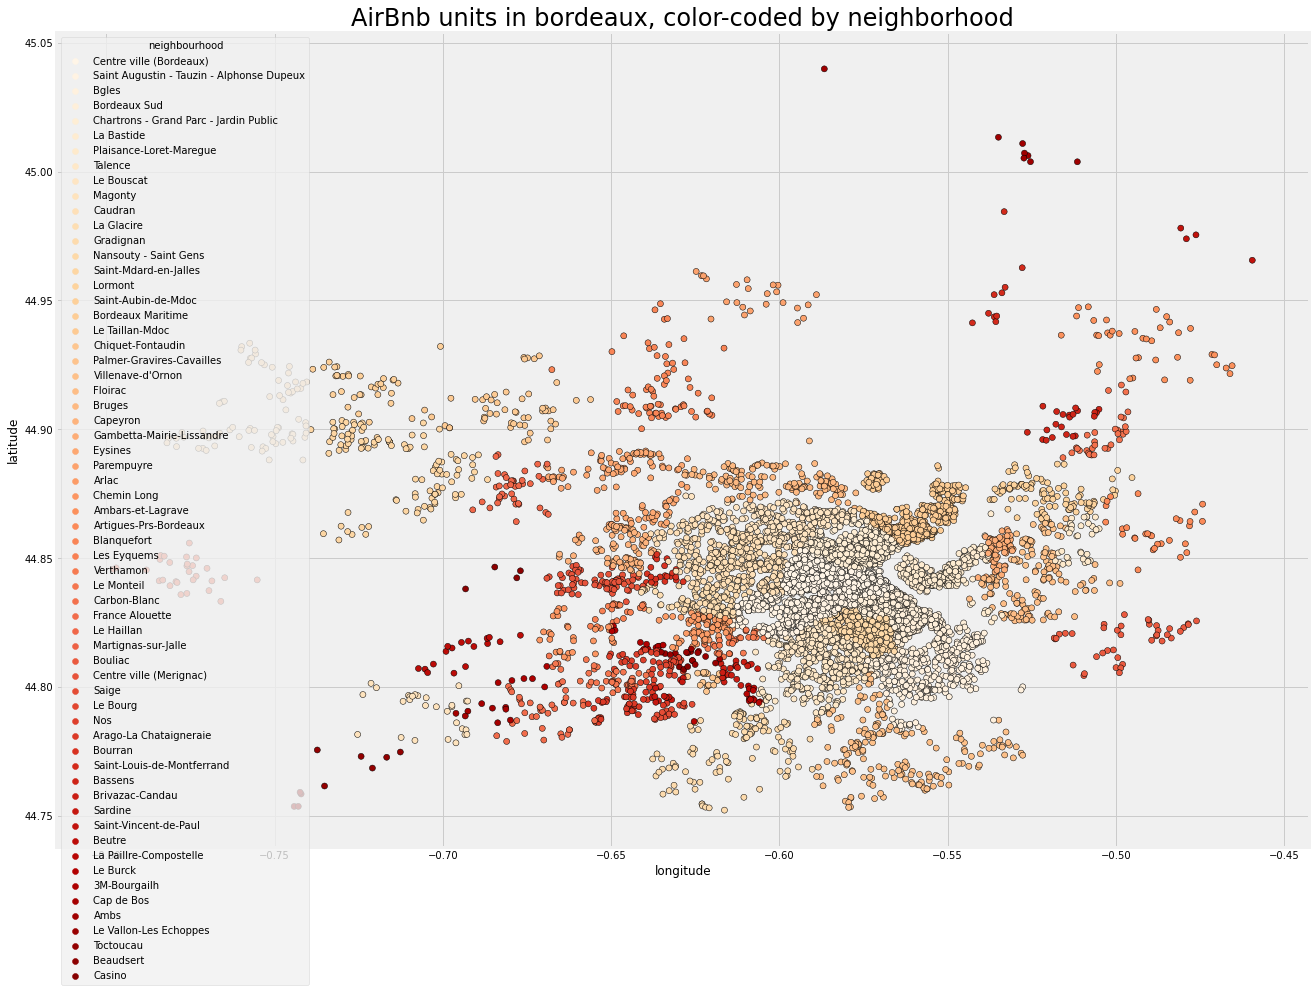

In [14]:
title = 'AirBnb units in bordeaux, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_bordeaux_unique.longitude, master_df_bordeaux_unique.latitude, hue = master_df_bordeaux_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_bordeaux.png')
plt.show()

## Add review data through a join

In [15]:
df_reviews = pd.concat([bordeaux_raw_df_10_6_2021,raw_df_bordeaux],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['room_type']=='Entire home/apt']
df_reviews_.shape

(7072, 75)

## Regression

In [16]:
#df_reviews_.columns

In [17]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [18]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  17.640212260914694
Coefficients:  [ 16.0386003   42.29302872  -5.97832707   0.4579798    2.77312142
  -6.3968489   -7.90351145  25.4963275  -23.54187782]
LinearRegression()


In [19]:
y_pred2 = regr.predict(X_)

In [20]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 50')
df_result.head()
df_result.shape

(5412, 3)

<function matplotlib.pyplot.ylim(*args, **kwargs)>

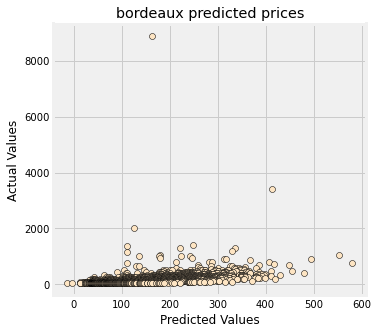

In [21]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('bordeaux predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim

In [22]:
df_result.index

Int64Index([4547, 5311, 2693, 6783, 2583, 1322, 7317, 6800, 8308, 5809,
            ...
            6844, 1401,   16, 6222, 8373, 4877, 6793, 5367,  196, 4297],
           dtype='int64', length=5412)

In [23]:
raw_df_bordeaux.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,28925,https://www.airbnb.com/rooms/28925,20211014050648,2021-10-14,Grande maison centre ville Comme à la campagne,"If you just open the housedoor, you'll feel like in the countryside due to our wild garden. But if you walk less than 15 minutes, you'll enjoy the city heart of Bordeaux. Public transports (tram D Croix de Seguey) and shops are quick to reach, bars and restaurants also. The next organic baguettes and croissant are less than 2 minutes walk on a sweet little square. Drivng out to the ocean or the vinyards is also really fast.<br /><br /><b>The space</b><br />In the Ground floor, you'll find the big living roomwith garden view and its open kitchen fully equiped. A part of this room can be transformed in a nice 2 people bedroom with curtains. We also have a shower and toilets. A second kitchen with a washing machine and a dryer. Both kitchen have a dishwasher. <br />1st floor : 5 bedrooms with their 1 person highbed and a sofabed for 2. It also has 2 bathrooms (shower, handwash and toilets). On the last floor under the roof you'll find a parents bedroom with its bathroom (shower, handwas","A fex minutes from the house, you'll find nice little shops and markets, coffees and restaurants. Tram and buses bring you to the center and are all reachable in less than 5 minutes. We are mostly familiesin the neighborhood and the gardens behind the houses make it a very typical, quiet and peaceful place.",https://a0.muscache.com/pictures/miso/Hosting-28925/original/407dea85-62fc-4c00-a3ec-cd6794bdd739.jpeg,124398,https://www.airbnb.com/users/show/124398,...,5.00,5.00,4.50,33063005371B2,f,1,1,0,0,0.05
1,218103,https://www.airbnb.com/rooms/218103,20211014050648,2021-10-14,B&B Apart.Suite / tropical garden,"<b>The space</b><br />The Bambooyard : ""Le clos des Bambous"", in Bègles (Bordeaux South), is an atypical Guest House that offers a perfect compromise between privacy independence of a hotel and simplicity, usability and family spirit expected of a guest room.<br /><br />Its particularity is that the Guest House is separated from the owner's house by a bamboo curtain and is located in an unexpected and exceptional setting within a tropical and exotic garden. <br /><br />You will discover a unique haven in the city where to rest and relax with the possibility of access to set of services for your Wellness and confort : <br />- Breakfast service 10 € / person ( ordered at last 1 day beforehand ) <br />- Outdoor 35° C Swimming jacuzzi : 10 € / hour /person<br />- Possibility of a 2nd bedding ( convertible couch ) charged 20 € / night<br />- A set of massages thaï massages* from 60 € /hour.... <br />- A wide reception room* ideal for private celebrations, parties, events.. <br />.. (",NaN,https://a0.muscache.com/pictures/9ba23c8f-4780-4b3e-9be8-b0fdf74d9d53.jpg,1127981,https://www.airbnb.com/users/show/1127981,...,4.96,4.58,4.55,NaN,f,4,4,0,0,0.48
2,222887,https://www.airbnb.com/rooms/222887,20211014050648,2021-10-14,"Bordeaux Terrace - spectacular view, fast Wifi","Picture yourself on a 12 metre terrace overlooking the ancient city gate, Porte de Bourgogne, and the Garonne River beyond. Here you can sip a glass of Bordeaux wine and savour an al fresco meal, prepared in the well-equipped kitchen or delivered to your door. <br />Bordeaux Terrace apartment has an elevator, super fast Fibre Optic Wifi and Cable TV with French and English stations. The major sights of the city are in close proximity. The tram stop is just 100 metres away, and parking is nearby.<br /><br /><b>The space</b><br />In an 18th century building in the historic heart of Bordeau

In [24]:
df_result['id'] = df_result.index.values
df_result.shape

(5412, 4)

In [25]:
raw_df_bordeaux.index.values
df_result.index.values

array([4547, 5311, 2693, ..., 5367,  196, 4297])

In [26]:
df_result_merge = df_result.merge(raw_df_bordeaux, on='id', how='right')
df_result_merge.columns
df_result_merge.shape

(9424, 77)

In [27]:
df_join = df_result.join(raw_df_bordeaux, lsuffix='_x', rsuffix='_y')
df_join.isna().sum()

Actual                                            0
Predicted                                         0
Diff                                              0
id_x                                              0
id_y                                              0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               762
Length: 78, dtype: int64

In [28]:
df_join.columns

Index(['Actual', 'Predicted', 'Diff', 'id_x', 'id_y', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm'

In [29]:
df_print =df_join.copy()
df_print = df_print[['id_x','Actual', 'price','Predicted', 'Diff','listing_url','latitude',
       'longitude','accommodates','neighbourhood_cleansed','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','number_of_reviews']]
df_print_bordeaux = df_print[df_print['Predicted']>0]
df_print_bordeaux.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
4547,4547,8890,"$8,890.00",164.235878,-8725.764122,https://www.airbnb.com/rooms/27577923,44.83002,-0.62194,4,La Glacire,2.0,3.0,1.0,2.0,2.0,4.0,3.0,1
5311,5311,3401,"$3,401.00",413.168337,-2987.831663,https://www.airbnb.com/rooms/33958171,44.80518,-0.65079,12,Le Monteil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2693,2693,2000,"$2,000.00",124.948558,-1875.051442,https://www.airbnb.com/rooms/18542409,44.91976,-0.63628,6,Blanquefort,5.0,5.0,5.0,5.0,5.0,4.5,5.0,7
6783,6783,1385,"$1,385.00",111.205981,-1273.794019,https://www.airbnb.com/rooms/42132908,44.83709,-0.59829,4,Centre ville (Bordeaux),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2583,2583,1400,"$1,400.00",247.989785,-1152.010215,https://www.airbnb.com/rooms/18062951,44.86363,-0.60151,8,Le Bouscat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [30]:
df_print_bordeaux['neighbourhood_cleansed'].value_counts()

Centre ville (Bordeaux)                      1029
Bordeaux Sud                                  649
Chartrons - Grand Parc - Jardin Public        512
Bordeaux Maritime                             303
Saint Augustin - Tauzin - Alphonse Dupeux     289
                                             ... 
3M-Bourgailh                                    3
Saint-Vincent-de-Paul                           3
Casino                                          1
Ambs                                            1
Beaudsert                                       1
Name: neighbourhood_cleansed, Length: 62, dtype: int64

In [31]:
df_print_bordeaux_final = df_print_bordeaux.dropna(subset = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'])
df_print_bordeaux_final.isna().sum()

id_x                           0
Actual                         0
price                          0
Predicted                      0
Diff                           0
listing_url                    0
latitude                       0
longitude                      0
accommodates                   0
neighbourhood_cleansed         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
number_of_reviews              0
dtype: int64

In [32]:
df_bordeaux_query = df_print_bordeaux_final.query('number_of_reviews >11 & accommodates <=6')
df_bordeaux_query.shape
#df_bordeaux_query.head()

(1979, 18)

In [33]:
df_bordeaux_query_filter = df_bordeaux_query.query('accommodates<5 &review_scores_rating>4.5 & review_scores_location>4.5 &review_scores_value>4.5').sort_values(by=['Predicted'],ascending=False)
df_bordeaux_query_filter.shape


(1191, 18)

In [34]:
df_bordeaux_query_filter.shape

(1191, 18)

In [35]:
df_neighborhood_plot = df_print_bordeaux_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)
df_neighborhood_plot

,neighbourhood_cleansed,Actual
33,La Glacire,296.304348
59,Toctoucau,280.200000
45,Martignas-sur-Jalle,239.750000
44,Magonty,234.928571
40,Le Taillan-Mdoc,220.903226
53,Saint-Aubin-de-Mdoc,219.130435
57,Sardine,211.600000
0,3M-Bourgailh,195.000000
13,Bouliac,192.285714
10,Blanquefort,184.741935


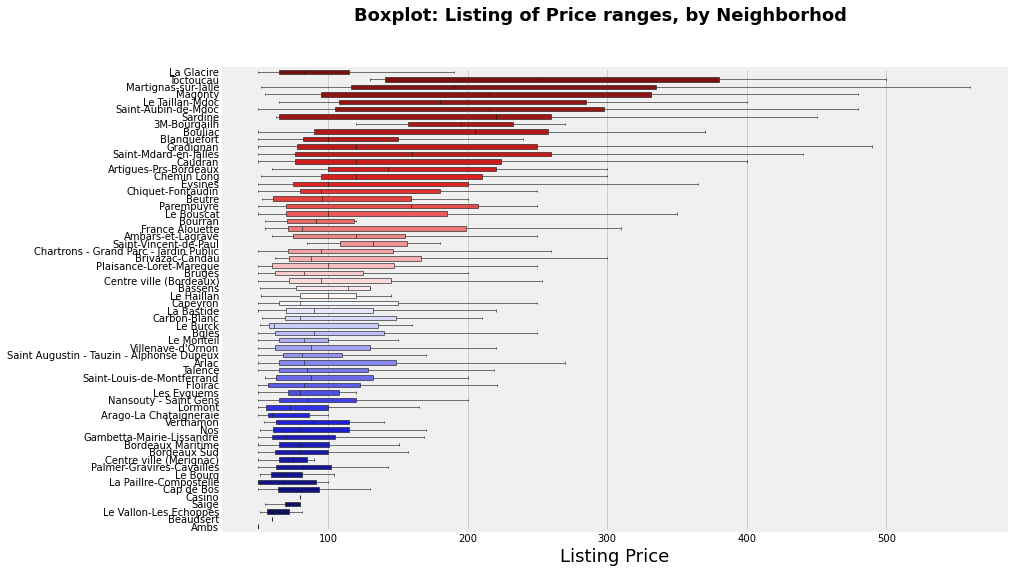

In [37]:
df_neighborhood_plot = df_print_bordeaux_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)

plt.figure(figsize=(4,5))
dft = df_print_bordeaux_final[["neighbourhood_cleansed", "Actual"]].copy()
sns.boxplot(x='Actual', y='neighbourhood_cleansed', data=dft, order=df_neighborhood_plot["neighbourhood_cleansed"].values,
            showfliers = False, palette="seismic_r", linewidth=0.6, width=0.6)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Listing Price", fontsize=18)
ax.set_ylabel("")
plt.suptitle("Boxplot: Listing of Price ranges, by Neighborhod", fontweight="bold", fontsize=18)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 8.5)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

fig.savefig('bordeaux_neighborhood_boxplot.png')

In [38]:
# to do:
    # regress rooms for 2 
    # regress rooms for 4
    # regress rooms for 6
    # regress all
    # keep track of resulting functions
    # save file to csv for later merging all cities
    # subplots
    

# regression function, rooms for 4 or less

In [39]:
df_regression = df_reviews_.copy()
df_regression_4 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_4 = df_regression_4[df_regression_4['beds'].notna()]
df_regression_4 = df_regression_4[df_regression_4['bedrooms'].notna()]
df_regression_4['price'] = pd.to_numeric(df_regression_4['price'])
df_regression_4.isna().sum()

df_regression_4 =df_regression_4.fillna(df_regression_4.mean())
df_regression_4 = df_regression_4[df_regression_4['accommodates']<=4]
print(f'There is {len(raw_df_bordeaux)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_4)} to be regressed with accommodates <=4')

There is 9424 files in the dataset
There is 4223 to be regressed with accommodates <=4


In [40]:
X_4 = df_regression_4[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_4 = df_regression_4['price'].replace({'\$':''}, regex = True)
Y_4 = y_4.replace({',':''}, regex=True)

# with sklearn
regr4 = LinearRegression()
regr4.fit(X_4, Y_4)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print (regr4)

Intercept:  137.57563374440963
Coefficients:  [  7.32896089  35.31850987  -4.32078906   0.31838571   0.26024022
 -13.08724441 -28.87920504  18.92278558  -3.8566151 ]
LinearRegression()


In [41]:
y_pred2_4 = regr4.predict(X_4)

In [42]:
df_mult_4= pd.DataFrame({'Actual': Y_4, 'Predicted': y_pred2_4.flatten()})
df_mult_4['Diff'] = df_mult_4['Predicted'] - df_mult_4['Actual']
df_mult_sort_4 = df_mult_4.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_4 = df_mult_sort_4.query('Actual >= 50')
df_result_4.head()
df_result_4.shape

(3498, 3)

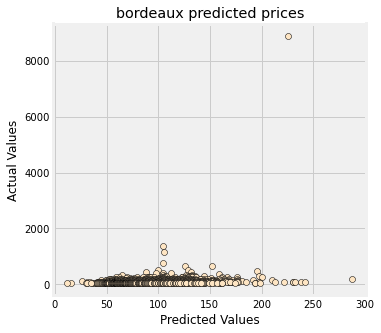

In [43]:
x_4 = df_result_4['Predicted']
y_4 = df_result_4['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('bordeaux predicted prices')
plt.scatter(x_4,y_4, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 2 or less

In [44]:
df_regression = df_reviews_.copy()
df_regression_2 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_2 = df_regression_2[df_regression_2['beds'].notna()]
df_regression_2 = df_regression_2[df_regression_2['bedrooms'].notna()]
df_regression_2['price'] = pd.to_numeric(df_regression_2['price'])
df_regression_2.isna().sum()

df_regression_2 = df_regression_2.fillna(df_regression_2.mean())
df_regression_2 = df_regression_2[df_regression_2['accommodates']<=2]
print(f'There is {len(raw_df_bordeaux)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_2)} to be regressed with accommodates <=2')

There is 9424 files in the dataset
There is 1721 to be regressed with accommodates <=2


In [45]:
X_2 = df_regression_2[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_2 = df_regression_2['price'].replace({'\$':''}, regex = True)
Y_2 = y_2.replace({',':''}, regex=True)

# with sklearn
regr2 = LinearRegression()
regr2.fit(X_2, Y_2)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print (regr2)

Intercept:  -64.05583696721396
Coefficients:  [ 13.98294945  18.90883586  -1.10908226   0.23684968   3.92279077
  10.42798833   6.52328666  15.63879592 -20.11933925]
LinearRegression()


In [46]:
y_pred2_2 = regr2.predict(X_2)

In [47]:
df_mult_2= pd.DataFrame({'Actual': Y_2, 'Predicted': y_pred2_2.flatten()})
df_mult_2['Diff'] = df_mult_2['Predicted'] - df_mult_2['Actual']
df_mult_sort_2 = df_mult_2.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_2 = df_mult_sort_2.query('Actual >= 50')
df_result_2.head()
df_result_2.shape

(1302, 3)

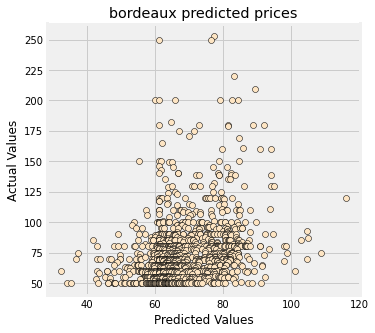

In [48]:
x_2 = df_result_2['Predicted']
y_2 = df_result_2['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('bordeaux predicted prices')
plt.scatter(x_2,y_2, edgecolor='black')
plt.show()

## Regression fucntion, rooms for 6 or less

In [49]:
## Regression fucntion, rooms for 2 or less

In [50]:
df_regression = df_reviews_.copy()
df_regression_6 = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_6 = df_regression_6[df_regression_6['beds'].notna()]
df_regression_6 = df_regression_6[df_regression_6['bedrooms'].notna()]
df_regression_6['price'] = pd.to_numeric(df_regression_6['price'])
df_regression_6.isna().sum()

df_regression_6 = df_regression_6.fillna(df_regression_6.mean())
df_regression_6 = df_regression_6[df_regression_6['accommodates']<=6]
print(f'There is {len(raw_df_bordeaux)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_6)} to be regressed with accommodates <=6')

There is 9424 files in the dataset
There is 5520 to be regressed with accommodates <=6


In [51]:
X_6 = df_regression_6[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_6 = df_regression_6['price'].replace({'\$':''}, regex = True)
Y_6 = y_6.replace({',':''}, regex=True)

# with sklearn
regr6 = LinearRegression()
regr6.fit(X_6, Y_6)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)

print (regr6)

Intercept:  70.2073020463521
Coefficients:  [  9.76670731  40.08344093  -5.36420177   0.3915074    2.70531594
  -7.4267819  -15.84557355  24.20259849 -18.93531769]
LinearRegression()


In [52]:
y_pred6_6 = regr6.predict(X_6)

In [53]:
df_mult_6= pd.DataFrame({'Actual': Y_6, 'Predicted': y_pred6_6.flatten()})
df_mult_6['Diff'] = df_mult_6['Predicted'] - df_mult_6['Actual']
df_mult_sort_6 = df_mult_6.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_6 = df_mult_sort_6.query('Actual >= 50')
df_result_6.head()
df_result_6.shape

(4769, 3)

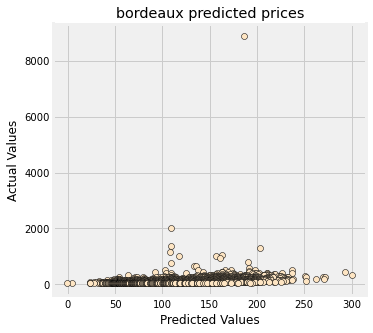

In [54]:
x_6 = df_result_6['Predicted']
y_6 = df_result_6['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('bordeaux predicted prices')
plt.scatter(x_6,y_6, edgecolor='black')
plt.show()

## regressing all

In [55]:
df_regression = df_reviews_.copy()
df_regression_all = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value',]]
df_regression_all = df_regression_all[df_regression_all['beds'].notna()]
df_regression_all = df_regression_all[df_regression_all['bedrooms'].notna()]
df_regression_all['price'] = pd.to_numeric(df_regression_all['price'])
df_regression_all.isna().sum()

df_regression_all = df_regression_all.fillna(df_regression_all.mean())
#df_regression_all = df_regression_all[df_regression_all['accommodates']<=all]
print(f'There is {len(raw_df_bordeaux)} files in the dataset')
#print(f'There is {len(df_reviews_)} in the entire data set')
print(f'There is {len(df_regression_all)} to be regressed')

There is 9424 files in the dataset
There is 6164 to be regressed


In [56]:
X_all = df_regression_all[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y_all = df_regression_all['price'].replace({'\$':''}, regex = True)
Y_all = y_all.replace({',':''}, regex=True)

# with sklearn
regrall = LinearRegression()
regrall.fit(X_all, Y_all)

print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print (regrall)

Intercept:  17.640212260914694
Coefficients:  [ 16.0386003   42.29302872  -5.97832707   0.4579798    2.77312142
  -6.3968489   -7.90351145  25.4963275  -23.54187782]
LinearRegression()


In [57]:
y_predall_all = regrall.predict(X_all)

In [58]:
df_mult_all= pd.DataFrame({'Actual': Y_all, 'Predicted': y_predall_all.flatten()})
df_mult_all['Diff'] = df_mult_all['Predicted'] - df_mult_all['Actual']
df_mult_sort_all = df_mult_all.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result_all = df_mult_sort_all.query('Actual >= 50')
df_result_all.head()
df_result_all.shape

(5412, 3)

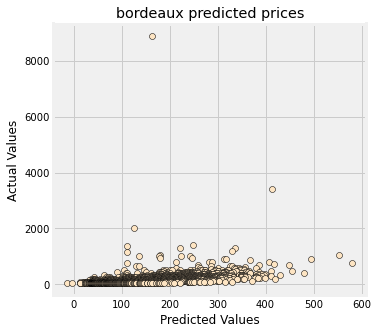

In [59]:
x_all = df_result_all['Predicted']
y_all = df_result_all['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('bordeaux predicted prices')
plt.scatter(x_all,y_all, edgecolor='black')
plt.show()

In [60]:
df_regression_all.head()

,id,property_type,room_type,accommodates,bedrooms,beds,price,availability_90,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value
0,28925,Entire residential home,Entire home/apt,12,6.0,14.0,255,0,5.00,5.00,4.50,5.00,4.50
1,218103,Entire rental unit,Entire home/apt,4,1.0,0.0,110,13,4.74,4.75,4.74,4.58,4.55
2,222887,Entire rental unit,Entire home/apt,4,2.0,3.0,158,65,4.70,4.67,4.47,4.71,4.49
3,317273,Entire rental unit,Entire home/apt,3,1.0,2.0,162,29,4.89,4.96,4.68,4.89,4.59
4,317658,Entire rental unit,Entire home/apt,6,2.0,4.0,200,47,4.85,4.73,4.77,4.97,4.65


In [61]:
print('Intercept: ', regrall.intercept_)
print('Coefficients: ', regrall.coef_)

print('Intercept: ', regr2.intercept_)
print('Coefficients: ', regr2.coef_)

print('Intercept: ', regr4.intercept_)
print('Coefficients: ', regr4.coef_)

print('Intercept: ', regr6.intercept_)
print('Coefficients: ', regr6.coef_)


Intercept:  17.640212260914694
Coefficients:  [ 16.0386003   42.29302872  -5.97832707   0.4579798    2.77312142
  -6.3968489   -7.90351145  25.4963275  -23.54187782]
Intercept:  -64.05583696721396
Coefficients:  [ 13.98294945  18.90883586  -1.10908226   0.23684968   3.92279077
  10.42798833   6.52328666  15.63879592 -20.11933925]
Intercept:  137.57563374440963
Coefficients:  [  7.32896089  35.31850987  -4.32078906   0.31838571   0.26024022
 -13.08724441 -28.87920504  18.92278558  -3.8566151 ]
Intercept:  70.2073020463521
Coefficients:  [  9.76670731  40.08344093  -5.36420177   0.3915074    2.70531594
  -7.4267819  -15.84557355  24.20259849 -18.93531769]


In [62]:
df_bordeaux_query_filter.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
613,613,126,$126.00,187.602146,61.602146,https://www.airbnb.com/rooms/6593259,44.84075,-0.51881,4,Floirac,4.62,4.83,4.51,4.77,4.78,4.65,4.56,115
130,130,117,$117.00,184.177223,67.177223,https://www.airbnb.com/rooms/1949284,44.84009,-0.58434,4,Centre ville (Bordeaux),4.54,4.77,4.77,4.85,4.92,4.77,4.54,13
6074,6074,120,$120.00,180.017092,60.017092,https://www.airbnb.com/rooms/37486477,44.82280,-0.57497,4,Nansouty - Saint Gens,4.93,5.00,4.87,4.93,5.00,5.00,4.80,15
577,577,210,$210.00,172.138693,-37.861307,https://www.airbnb.com/rooms/6448246,44.83489,-0.60726,4,Saint Augustin - Tauzin - Alphonse Dupeux,4.95,5.00,4.95,5.00,5.00,4.52,4.81,21
6135,6135,90,$90.00,170.733245,80.733245,https://www.airbnb.com/rooms/37883244,44.90631,-0.63854,4,Blanquefort,4.73,4.53,4.53,4.67,4.93,4.67,4.53,15


## Find the highest predicted in bordeaux - <= 4

In [66]:
df_bordeaux_query_filter['% Diff'] = (df_bordeaux_query_filter['Price']/df_bordeaux_query_filter['Predicted']-1)* 100
df_bordeaux_query_filter.rename(columns={'id_x':'id',
                                     'Actual':'Price',
                                     'neighbourhood_cleansed':'neighborhood',
                                     'review_scores_rating':'rating',
                                     'review_scores_accuracy':'accuracy',
                                     'review_scores_cleanliness':'cleanliness',
                                     'review_scores_checkin':'check-in',
                                     'review_scores_communication':'communication',
                                     'review_scores_location':'location',
                                     'review_scores_value':'value'}, inplace=True)
df_bordeaux_query_final = df_bordeaux_query_filter[['Price', 'Predicted','% Diff','rating', 'accuracy','cleanliness',
                                            'location','value','neighborhood','listing_url','accommodates','number_of_reviews']]

print('Constraints: Accommodates <=4;\nUnit is entire home or apartment;\nPrice is <400 per night')
print(f'Total of: {len(df_bordeaux_query_final)} listings that meet criteria')
df_bordeaux_query_final.round({'Predicted':2, 'Diff':2, '% Diff':2}).head(6)


Constraints: Accommodates <=4;
Unit is entire home or apartment;
Price is <400 per night
Total of: 1191 listings that meet criteria


,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
613,126,187.60,-32.84,4.62,4.83,4.51,4.65,4.56,Floirac,https://www.airbnb.com/rooms/6593259,4,115
130,117,184.18,-36.47,4.54,4.77,4.77,4.77,4.54,Centre ville (Bordeaux),https://www.airbnb.com/rooms/1949284,4,13
6074,120,180.02,-33.34,4.93,5.00,4.87,5.00,4.80,Nansouty - Saint Gens,https://www.airbnb.com/rooms/37486477,4,15
577,210,172.14,21.99,4.95,5.00,4.95,4.52,4.81,Saint Augustin - Tauzin - Alphonse Dupeux,https://www.airbnb.com/rooms/6448246,4,21
6135,90,170.73,-47.29,4.73,4.53,4.53,4.67,4.53,Blanquefort,https://www.airbnb.com/rooms/37883244,4,15
7425,91,168.64,-46.04,5.00,5.00,4.93,5.00,5.00,Gradignan,https://www.airbnb.com/rooms/44398716,4,14


## Find the best deal in bordeaux - <=4

In [64]:
df_bordeaux_deal = df_bordeaux_query_final[df_bordeaux_query_final['Price']<300].sort_values(by=['% Diff'], 
                                ascending=True).round({'Predicted':2, 'Diff':2, '% Diff':2})
df_bordeaux_deal.head(7)




,Price,Predicted,% Diff,rating,accuracy,cleanliness,location,value,neighborhood,listing_url,accommodates,number_of_reviews
8018,50,138.10,-63.79,4.77,4.77,4.83,4.77,4.67,Saint-Mdard-en-Jalles,https://www.airbnb.com/rooms/47973848,4,30
4940,52,137.59,-62.21,4.74,4.72,4.75,4.77,4.71,Lormont,https://www.airbnb.com/rooms/31244254,4,99
386,70,160.64,-56.42,4.79,4.90,4.43,4.76,4.74,Bordeaux Maritime,https://www.airbnb.com/rooms/5098388,4,100
1970,71,158.39,-55.17,4.88,4.91,4.95,4.79,4.88,Arlac,https://www.airbnb.com/rooms/13710209,4,129
1172,50,110.14,-54.60,4.78,4.86,4.91,4.77,4.68,Villenave-d'Ornon,https://www.airbnb.com/rooms/11174558,4,45
7427,60,129.47,-53.66,4.85,4.85,4.85,4.92,4.85,Floirac,https://www.airbnb.com/rooms/44408749,4,13
3020,55,117.57,-53.22,4.59,4.75,4.31,4.67,4.68,Bruges,https://www.airbnb.com/rooms/19649933,4,76
